In [1]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
from google.colab import files  # чтобы загружать файлы в облако через проводник 

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas
import json

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
uploaded = files.upload() #просто запускаем и выбираем файл в проводнике

Saving submissionsWithFormsCleanLikes.json to submissionsWithFormsCleanLikes.json


In [4]:
df = pd.read_json('/content/submissionsWithFormsCleanLikes.json')

In [8]:
df

,SubmissionLikes,Category,Description,Participation,Money,Age,ContactName,LiveTime,FeatureType,GeometryType,CoordinatesLongitude,CoordinatesLatitude,CreatedAt
0,67,"Общественные пространства, природа и экология","Благоустроить Силинский лес: освещение, дорожк...",Нет,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,0.000000,0.000000,2023-03-06T09:38:48.587Z
1,61,"Общественные пространства, природа и экология",Благоустроить Силинский лес,Нет,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,137.041787,50.572570,2023-03-06T09:40:23.085Z
2,109,Дороги и транспорт,Здание автовокзала требует колоссальной реконс...,Нет,Бюджетные,25-40,Олег,Более 5 лет,Feature,Point,137.031797,50.533640,2023-03-06T09:54:31.566Z
3,44,"Общественные пространства, природа и экология","Ремонтируют парк очень плохо, страшно коляской...",Нет,Бюджетные,До 25,ОльгаЛ,С рождения,Feature,Point,137.026578,50.543906,2023-03-06T10:07:14.739Z
4,185,"Здоровье, образование, спорт и культура",Реконструкция ДК Судостроитель,Нет,Бюджетные,25-40,Александра,"Жил, но уехал",Feature,Point,137.022575,50.542521,2023-03-15T07:08:22.533Z
5,116,"Общественные пространства, природа и экология",привести в современное состояние парки города...,Да,Пока не знаю,40-65,Елена,С рождения,Feature,Point,0.000000,0.000000,2023-03-15T07:23:58.030Z
6,123,Дороги и транспорт,Возрождение муниципального транспорта-автобусы...,Нет,Бюджетные,40-65,СЕРГЕЙ,Более 5 лет,Feature,Point,0.000000,0.000000,2023-03-15T07:27:43.646Z
7,152,Дороги и транспорт,Восстановить нормальную работу Комсомольского ...,Нет,Бюджетные,40-65,Елена,С рождения,Feature,Point,136.935375,50.406823,2023-03-15T07:38:16.299Z
8,101,"Здоровье, образование, спорт и культура",Предлагаю провести реконструкцию одной из глав...,Нет,Бюджетные,25-40,Сергей,С рождения,Feature,Point,0.000000,0.000000,2023-03-15T08:08:30.840Z
9,137,Дороги и транспорт,"Учитывая, что у нас в городе с очисткой дорог...",Да,Бюджетные,40-65,Игорь,Более 5 лет,Feature,Point,0.000000,0.000000,2023-03-16T00:29:34.708Z


In [10]:
df.shape

(145, 13)

In [4]:
def extract_comments_into_list(data):
    res = []
    for submission in data:
        attributes = submission.get('attributes')
        if attributes is None:
            continue
        description = attributes.get('description')
        if description is not None:
            res.append(description)
    return res

In [5]:
description = extract_comments_into_list(data)

In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import nltk
from transformers import pipeline

# Download the necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Load the pre-trained sentiment analysis model
MODEL = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Analyze a Russian comment
# comment = "Замечательный фильм! Очень трогательный и увлекательный!"
# result = model(comment)[0]
# print(f"Comment: {comment}\nSentiment: {result['label']} ({result['score']})")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
extracted_labels = []

In [9]:
for i in description:
    try:
        result = MODEL(i)[0]
    except Exception as e:
        print(e)
        continue
    extracted_labels.append(result['label'])
    print(f"Comment: {i}\nSentiment: {result['label']} ({result['score']})")

Comment: Благоустроить Силинский лес: освещение, дорожки для пешеходов и велосипедов, возможно обустроить площадки для мангалов
Sentiment: 4 stars (0.5210887789726257)
Comment: Благоустроить Силинский лес
Sentiment: 5 stars (0.5140944123268127)
Comment: Здание автовокзала требует колоссальной реконструкции, или же замены!
Sentiment: 4 stars (0.30640268325805664)
Comment: Ремонтируют парк очень плохо, страшно коляской проехать. Огородите детскую детскую площадку. В 12 дня не работает ни один аттракцион. Нужно отреставрировать парк нормально, 
Sentiment: 1 star (0.7516956329345703)
Comment: Реконструкция ДК Судостроитель
Sentiment: 5 stars (0.3653785288333893)
Comment:  привести в современное состояние парки города, где жители смогут отдохнуть от ежедневной суеты, заняться активными видами спорта и с пользой провести время
Sentiment: 5 stars (0.4818936586380005)
Comment: Возрождение муниципального транспорта-автобусы, трамваи
Sentiment: 5 stars (0.49841243028640747)
Comment: Восстановить

Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors


The size of tensor a (634) must match the size of tensor b (512) at non-singleton dimension 1
Comment: Реставрация здания бывшего детского дома, а так же территории вокруг него, для создания центра досуга для детей  (кружки, секции, кинотеатр, театр, художественные мастерские, станция юннатов и т.д.)
Sentiment: 5 stars (0.4376440942287445)
Comment: Построить в Комсомольске, скоростную трамвайную линию, и запустить троллейбусную линию в городе, если будет невозможно построить линию скоростного трамвая. Отремонтировать все тротуары и избавить их от всех неровностей, включая ямы и колдобины. 
Sentiment: 5 stars (0.49970632791519165)
Comment: При заезде в микрорайон Парус есть огромный пустырь, в котором раньше песок копали. По факту это место в центре города, возле реки с хорошей транспортной доступностью из любого микрорайона. Там можно сделать зону отдыха для молодежи с газонами и горками для скейтов, киосками с кофе и блинчиками, куда можно приехать после учебы, потусить с друзьями или

In [11]:
df = pd.DataFrame(extracted_labels, columns=['stars'])

In [13]:
def extract_star_int(star_str):
    return int(star_str.split(' ')[0])

In [14]:
df['stars_int'] = df['stars'].apply(extract_star_int)

In [16]:
import seaborn as sns

<Axes: xlabel='stars_int', ylabel='count'>

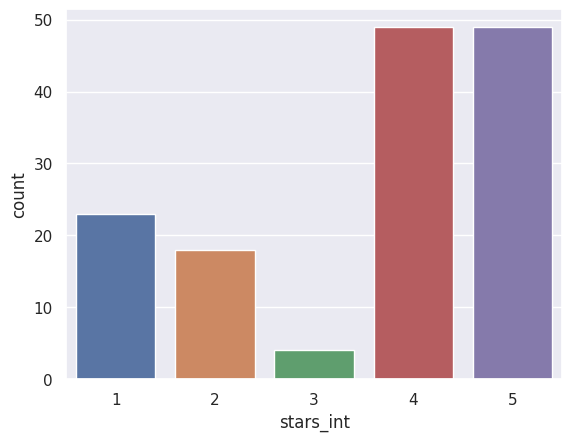

In [17]:
sns.countplot(x='stars_int', data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

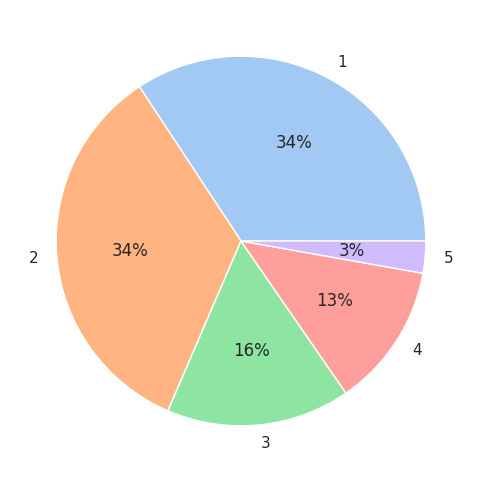

In [18]:
fig = plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[0:5]
counts = df['stars_int'].value_counts()
plt.pie(counts.values, labels=['1', '2', '3', '4', '5'], colors=colors, autopct='%0.f%%')
plt.show

# most popular

In [20]:
df

,stars,stars_int
0,4 stars,4
1,5 stars,5
2,4 stars,4
3,1 star,1
4,5 stars,5
...,...,...
138,4 stars,4
139,4 stars,4
140,4 stars,4
141,3 stars,3
